In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('merged_data_2023.csv')
df.head()

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2023-01,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN
1,2023-01,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect
2,2023-01,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect
3,2023-01,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Vehicle crime,Status update unavailable
4,2023-01,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Offender given a caution


In [55]:
null_counts = df.isnull().sum()

total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

print(null_summary)

                       Null Count  Null Percentage
Month                           0         0.000000
Falls within                    0         0.000000
Longitude                  100963         1.662226
Latitude                   100963         1.662226
Location                        0         0.000000
LSOA code                  194367         3.200002
LSOA name                  194367         3.200002
Crime type                      0         0.000000
Last outcome category     1071206        17.636025


In [56]:
df['Last outcome category'] = df['Last outcome category'].fillna(value='Not documented')

In [57]:
df = df.dropna(subset=['Longitude', 'Latitude'], how='any')
df.isnull().sum()


Month                        0
Falls within                 0
Longitude                    0
Latitude                     0
Location                     0
LSOA code                93404
LSOA name                93404
Crime type                   0
Last outcome category        0
dtype: int64

In [58]:
df.to_csv("E:\sherry\gp\\no_long_lat_nulls_2023.csv", index=False)


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14972\3968586386.py:1: SyntaxWarning: invalid escape sequence '\s'
  df.to_csv("E:\sherry\gp\\no_long_lat_nulls_2023.csv", index=False)


We did this step because the dataset is big and we save it after every couple of steps


In [59]:
df = pd.read_csv('no_long_lat_nulls_2023.csv')


In [60]:
df['Falls within'].value_counts()

Falls within
Metropolitan Police Service           1111443
West Midlands Police                   364658
West Yorkshire Police                  328117
Thames Valley Police                   200523
Northumbria Police                     192251
Kent Police                            191644
Hampshire Constabulary                 178076
South Yorkshire Police                 175436
Lancashire Constabulary                175011
Essex Police                           169296
Merseyside Police                      167203
Avon and Somerset Constabulary         158497
Sussex Police                          153722
South Wales Police                     134396
Nottinghamshire Police                 122980
Derbyshire Constabulary                114103
West Mercia Police                     109184
Leicestershire Police                  106465
Humberside Police                      105218
Staffordshire Police                   102754
Hertfordshire Constabulary             100851
Cleveland Police     

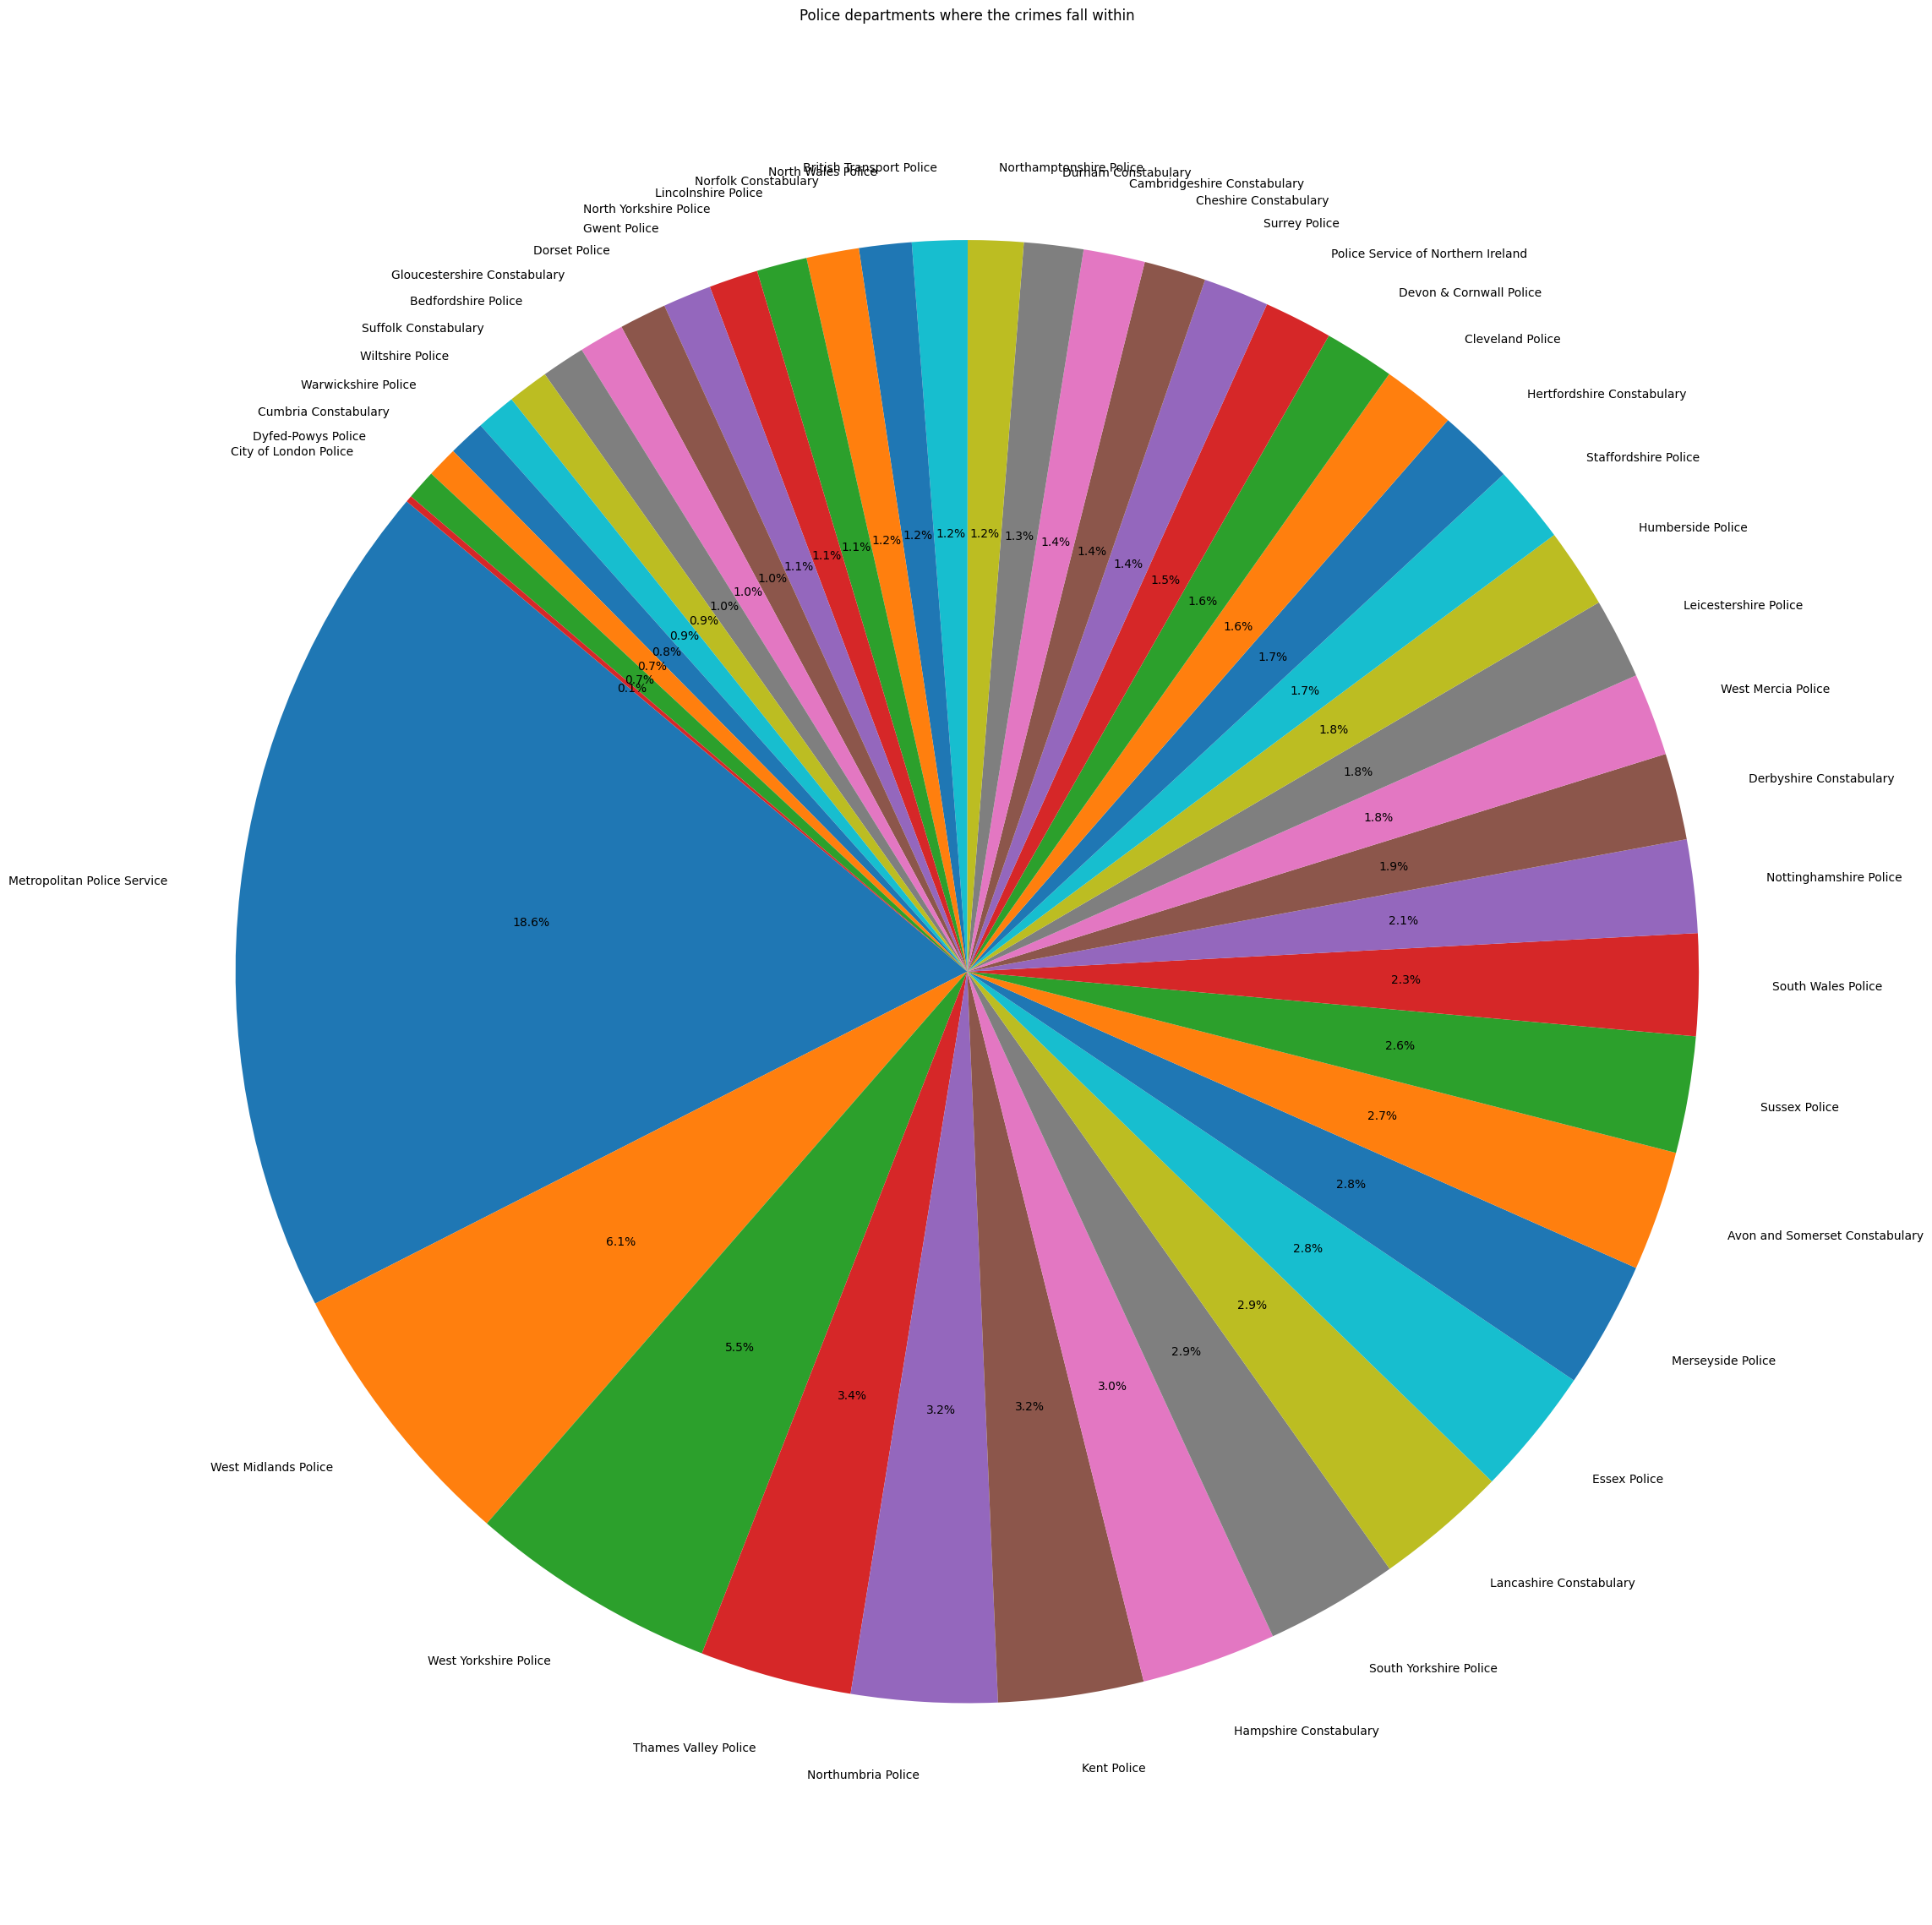

In [61]:
crime_type_counts = df['Falls within'].value_counts()

# Plotting
plt.figure(figsize=(23, 23))
crime_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Police departments where the crimes fall within')
plt.ylabel('')  # Remove y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [62]:
outcome_counts = df['Falls within'].value_counts()
outcome_percentages = (outcome_counts / outcome_counts.sum()) * 100
print(outcome_percentages)

Falls within
Metropolitan Police Service           18.607779
West Midlands Police                   6.105104
West Yorkshire Police                  5.493335
Thames Valley Police                   3.357156
Northumbria Police                     3.218666
Kent Police                            3.208504
Hampshire Constabulary                 2.981348
South Yorkshire Police                 2.937150
Lancashire Constabulary                2.930034
Essex Police                           2.834354
Merseyside Police                      2.799313
Avon and Somerset Constabulary         2.653557
Sussex Police                          2.573614
South Wales Police                     2.250058
Nottinghamshire Police                 2.058931
Derbyshire Constabulary                1.910312
West Mercia Police                     1.827959
Leicestershire Police                  1.782437
Humberside Police                      1.761560
Staffordshire Police                   1.720307
Hertfordshire Constabulary 

In [63]:
df['Crime type'].value_counts()

Crime type
Violence and sexual offences    2054511
Anti-social behaviour            933049
Other theft                      468262
Criminal damage and arson        467059
Public order                     458084
Shoplifting                      405187
Vehicle crime                    363321
Burglary                         249092
Drugs                            161311
Theft from the person            115645
Other crime                      106409
Robbery                           73724
Bicycle theft                     64489
Possession of weapons             52859
Name: count, dtype: int64

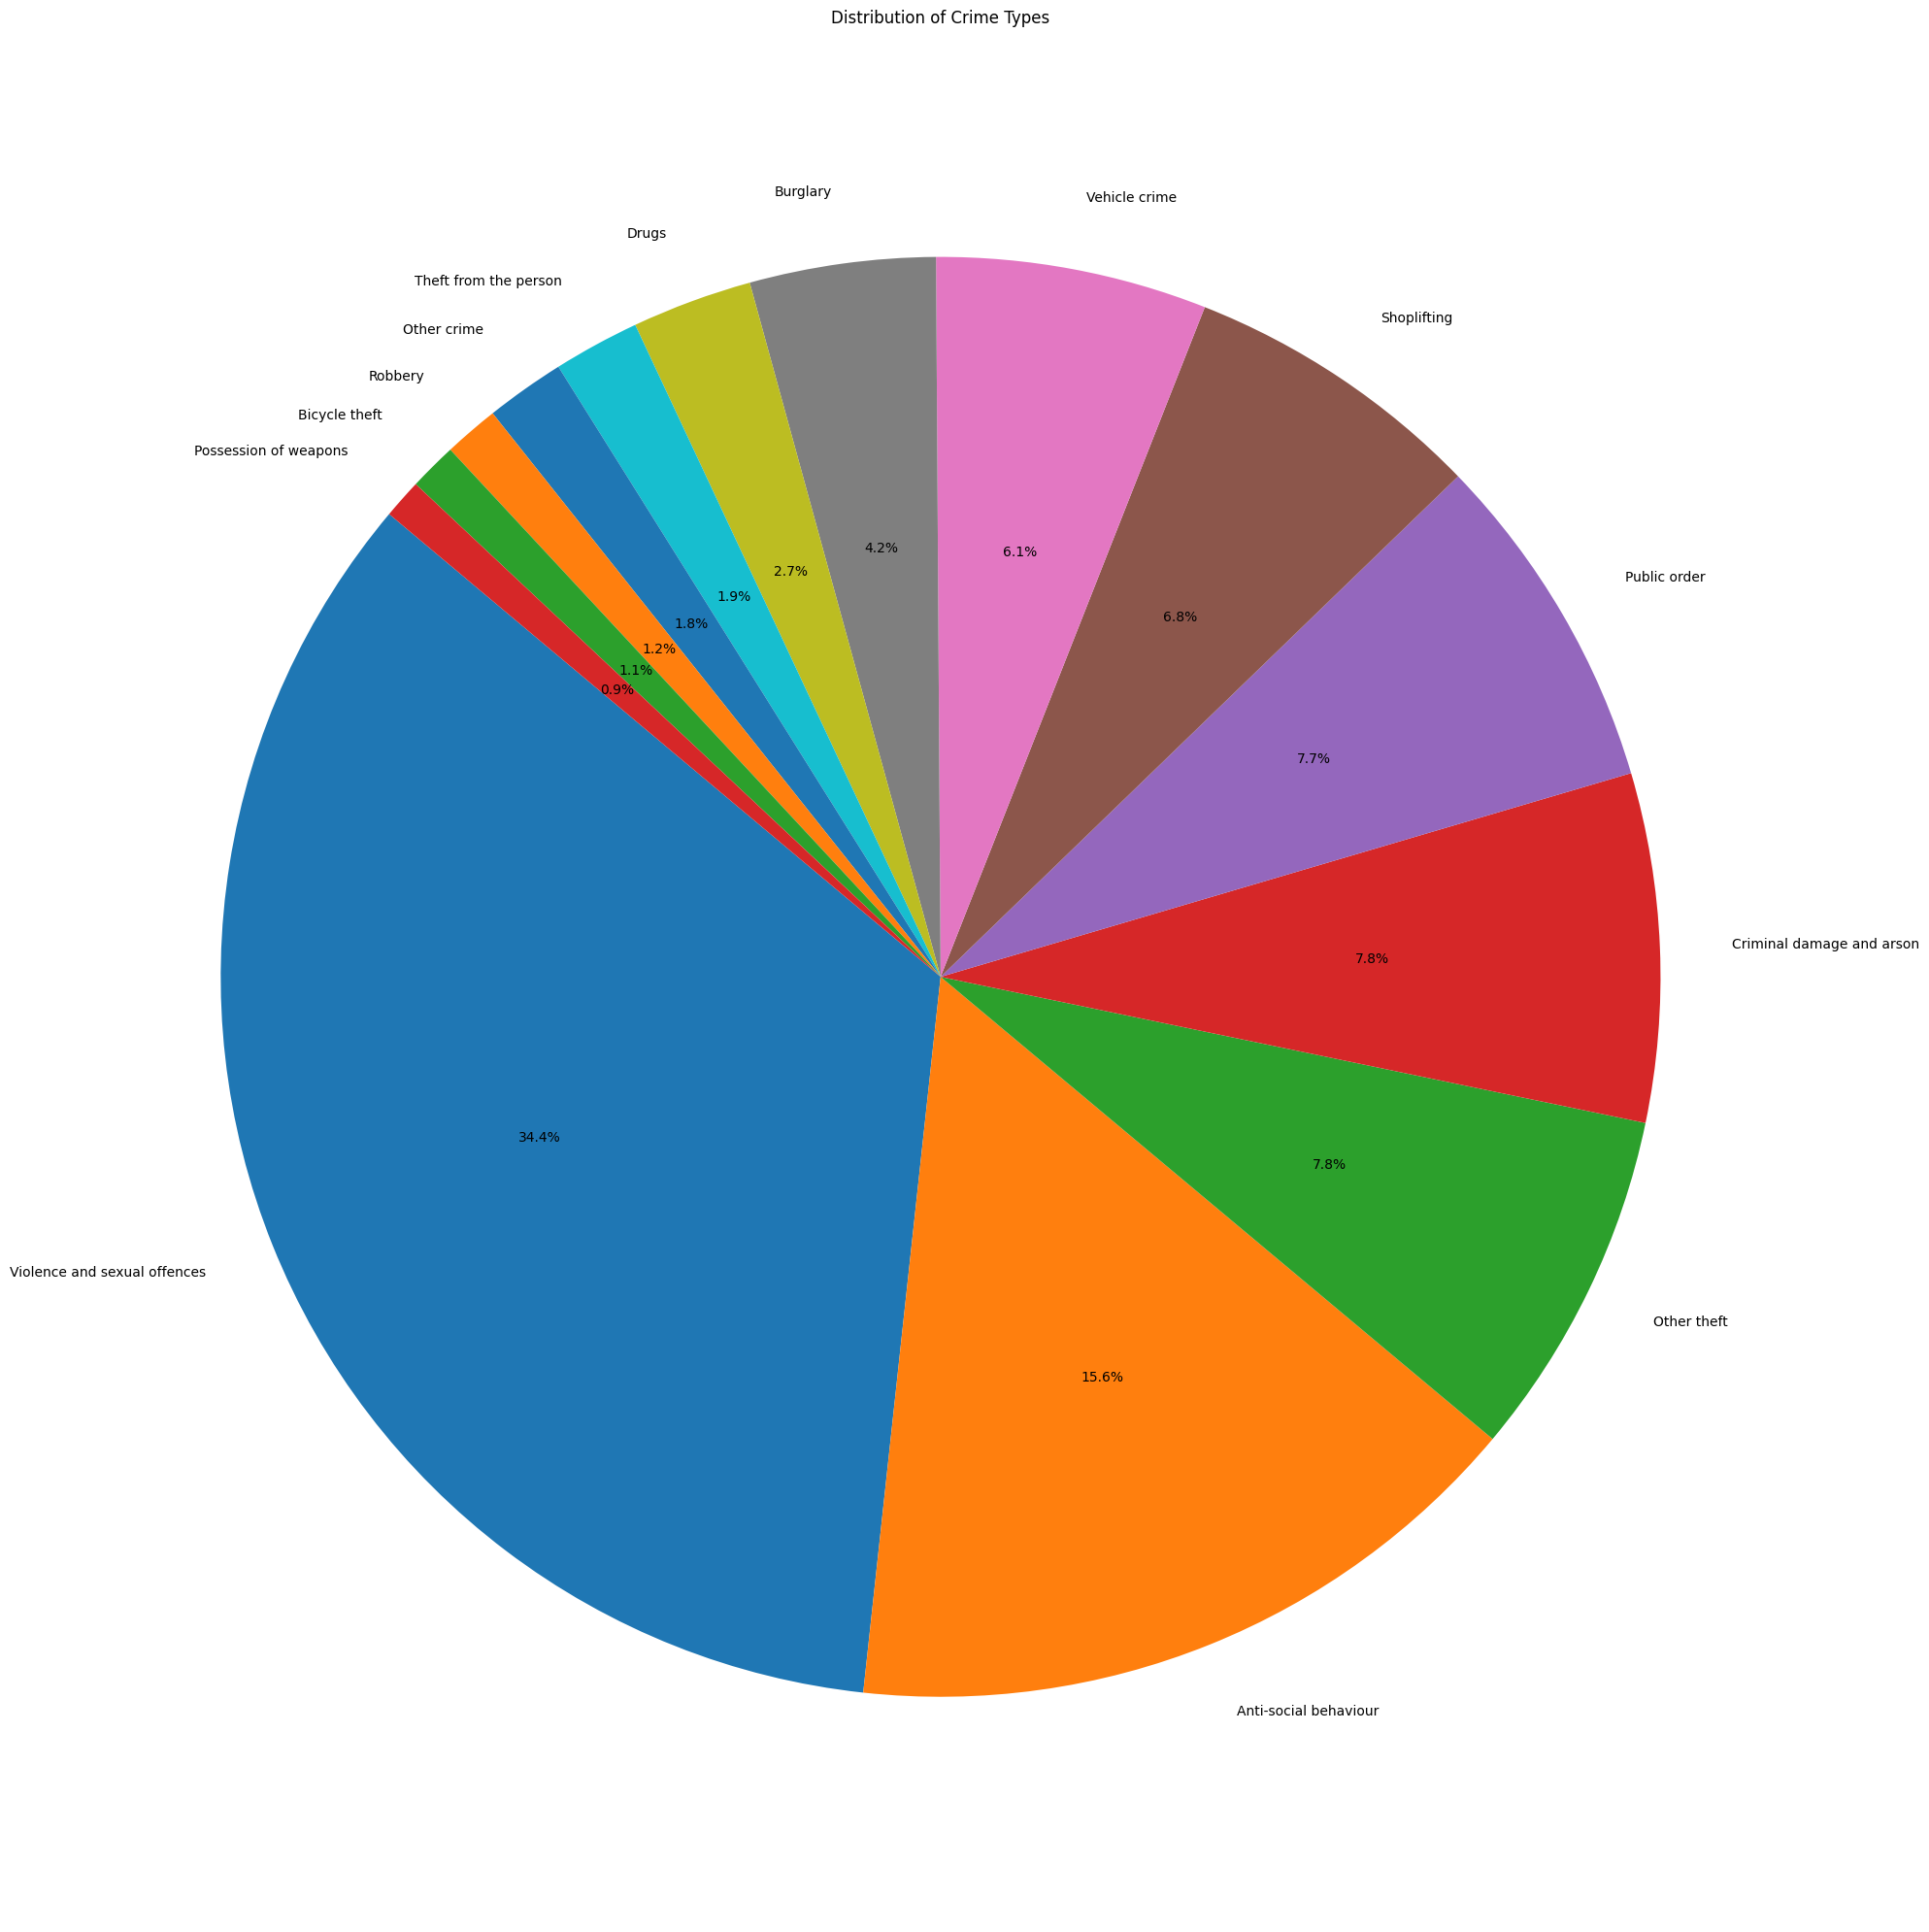

In [64]:
crime_type_counts = df['Crime type'].value_counts()

# Plotting
plt.figure(figsize=(20, 20))
crime_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Types')
plt.ylabel('')  # Remove y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


In [65]:
outcome_counts = df['Last outcome category'].value_counts()
outcome_percentages = (outcome_counts / outcome_counts.sum()) * 100
print(outcome_percentages)

Last outcome category
Investigation complete; no suspect identified          36.249126
Unable to prosecute suspect                            26.785342
Not documented                                         17.887086
Status update unavailable                               6.702325
Court result unavailable                                2.520743
Awaiting court outcome                                  2.424509
Under investigation                                     2.134772
Local resolution                                        2.096751
Action to be taken by another organisation              1.061727
Offender given a caution                                0.669328
Further investigation is not in the public interest     0.644199
Formal action is not in the public interest             0.333316
Further action is not in the public interest            0.330236
Offender given penalty notice                           0.075607
Suspect charged as part of another case                 0.055416
Off

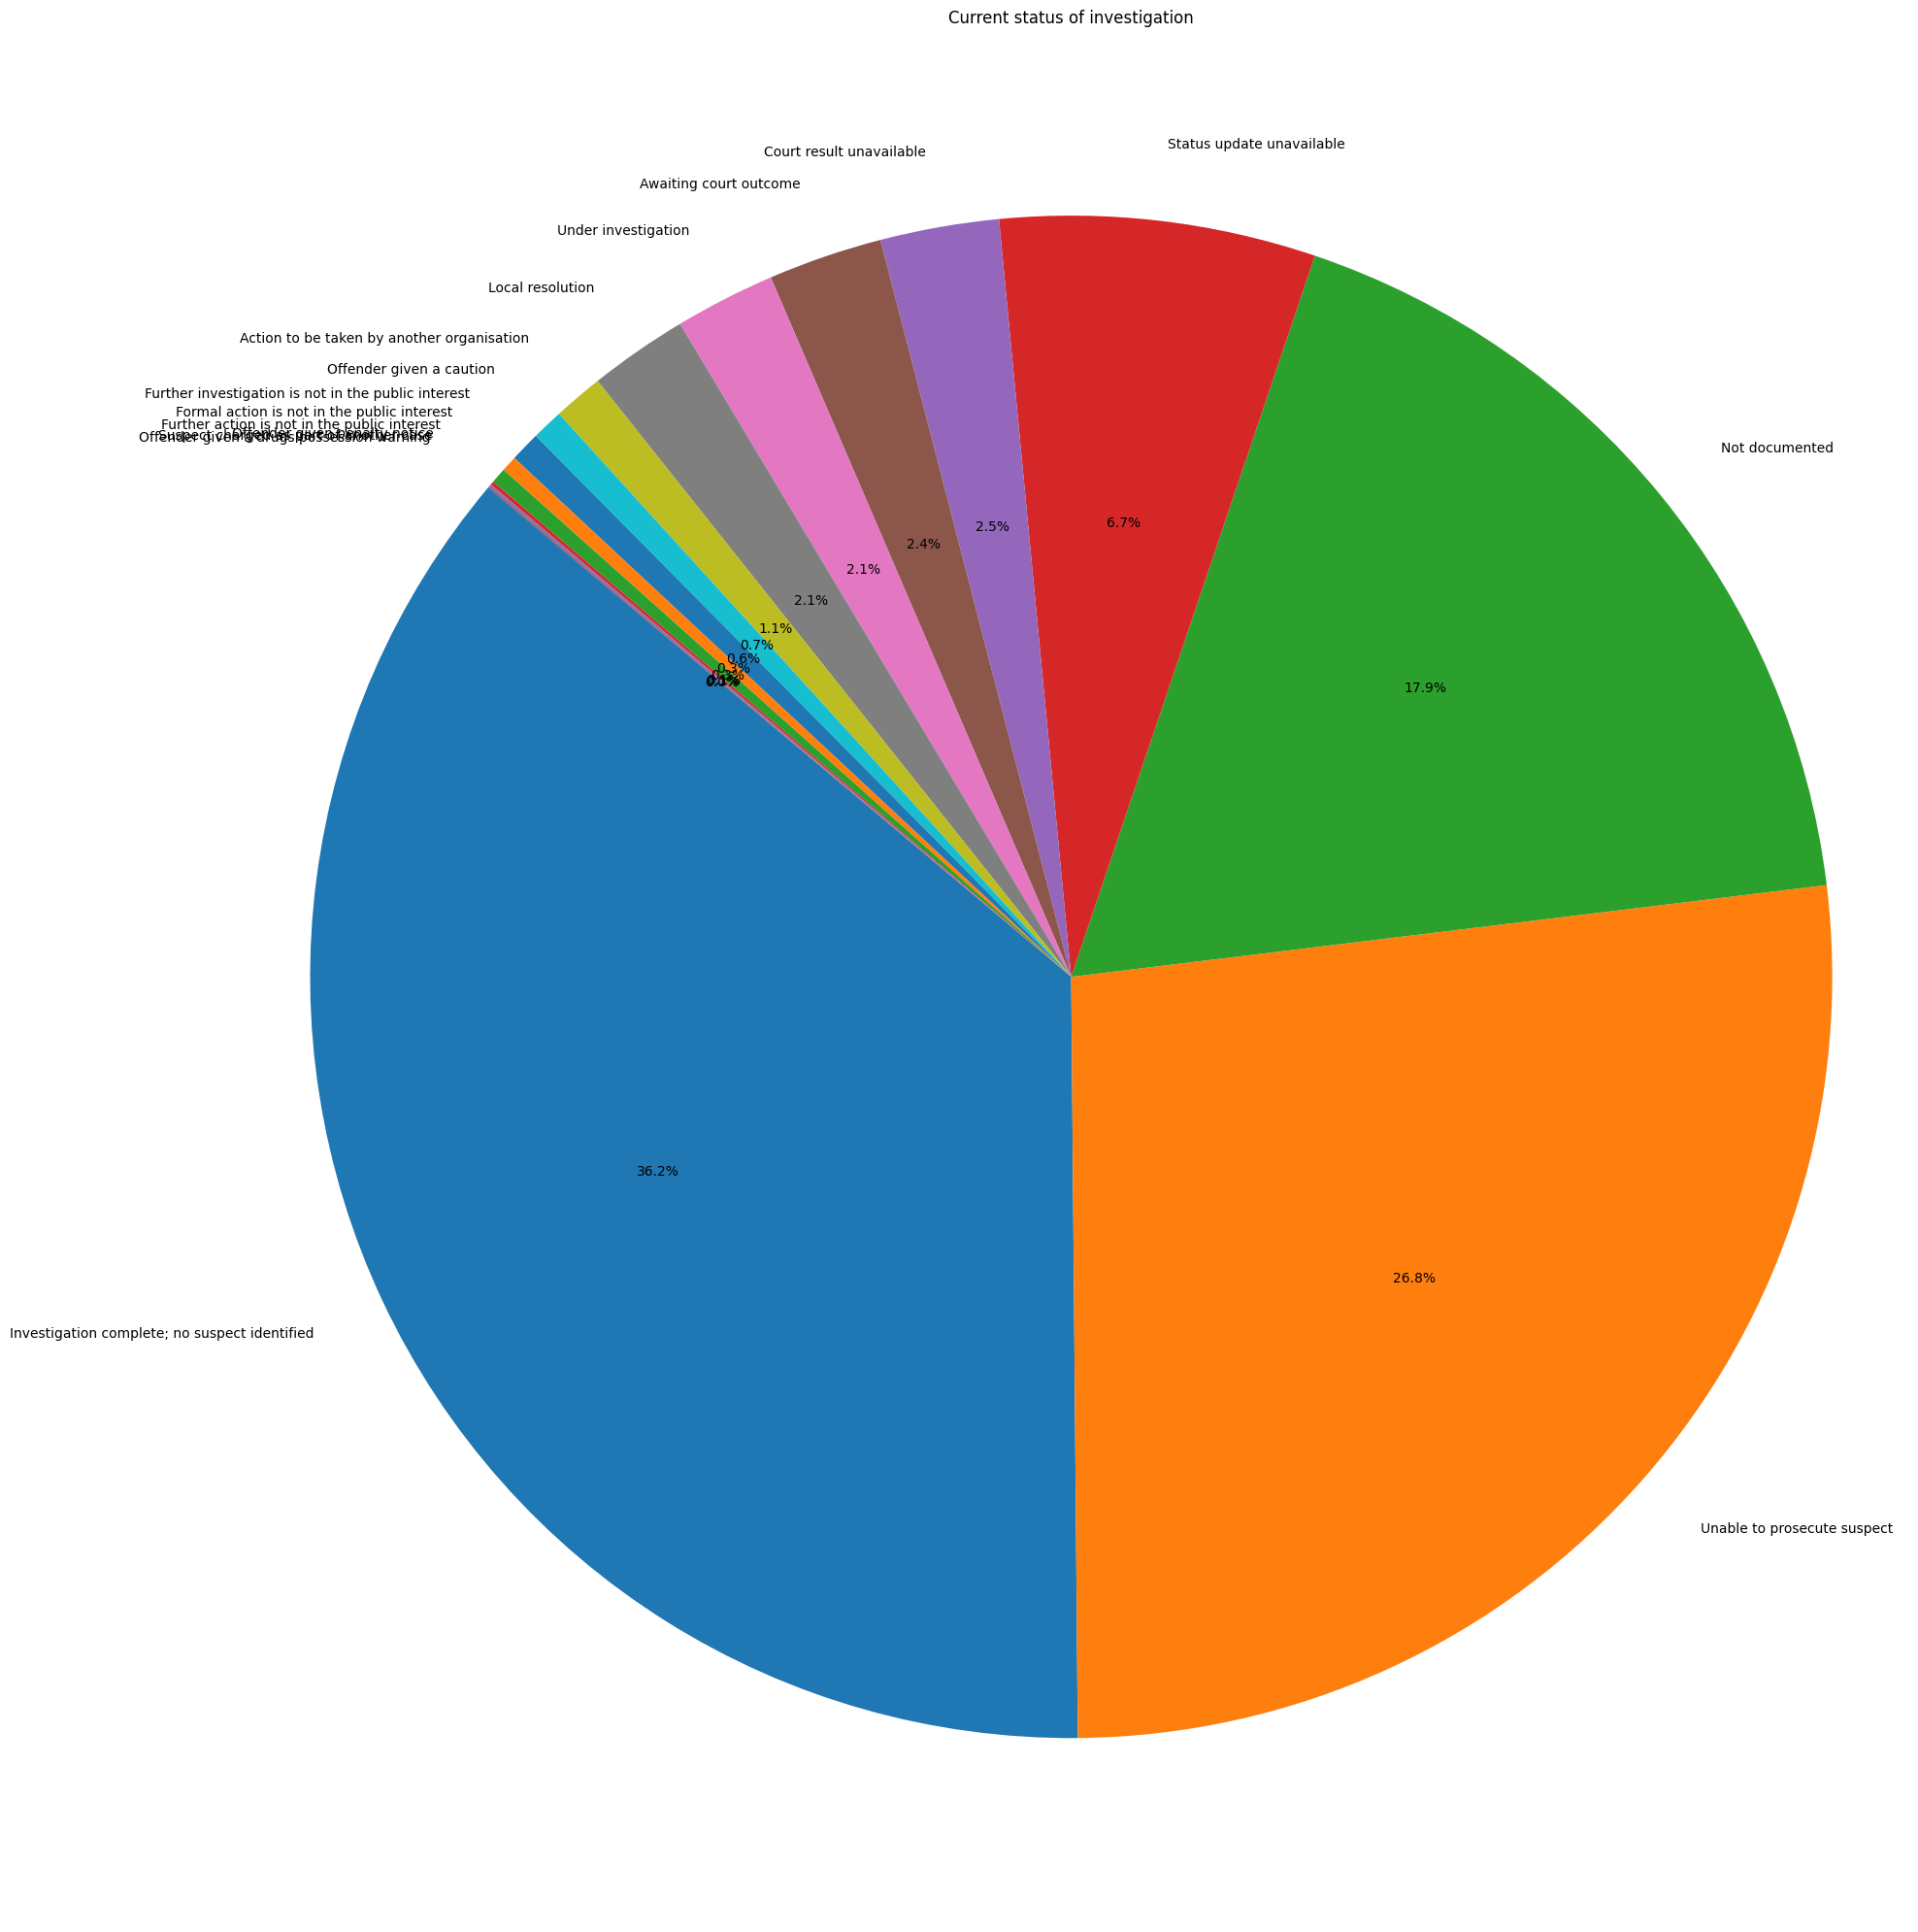

In [66]:
crime_type_counts = df['Last outcome category'].value_counts()

# Plotting
plt.figure(figsize=(20, 20))
crime_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Current status of investigation')
plt.ylabel('')  # Remove y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [67]:
df['LSOA name'].value_counts()

LSOA name
Westminster 018A       12613
Westminster 013B       12013
Westminster 013G       11459
City of London 001F     8235
Leeds 111B              8199
                       ...  
Rochdale 016B              1
Salford 014C               1
Cheshire East 031E         1
Manchester 015C            1
Wigan 027E                 1
Name: count, Length: 37428, dtype: int64

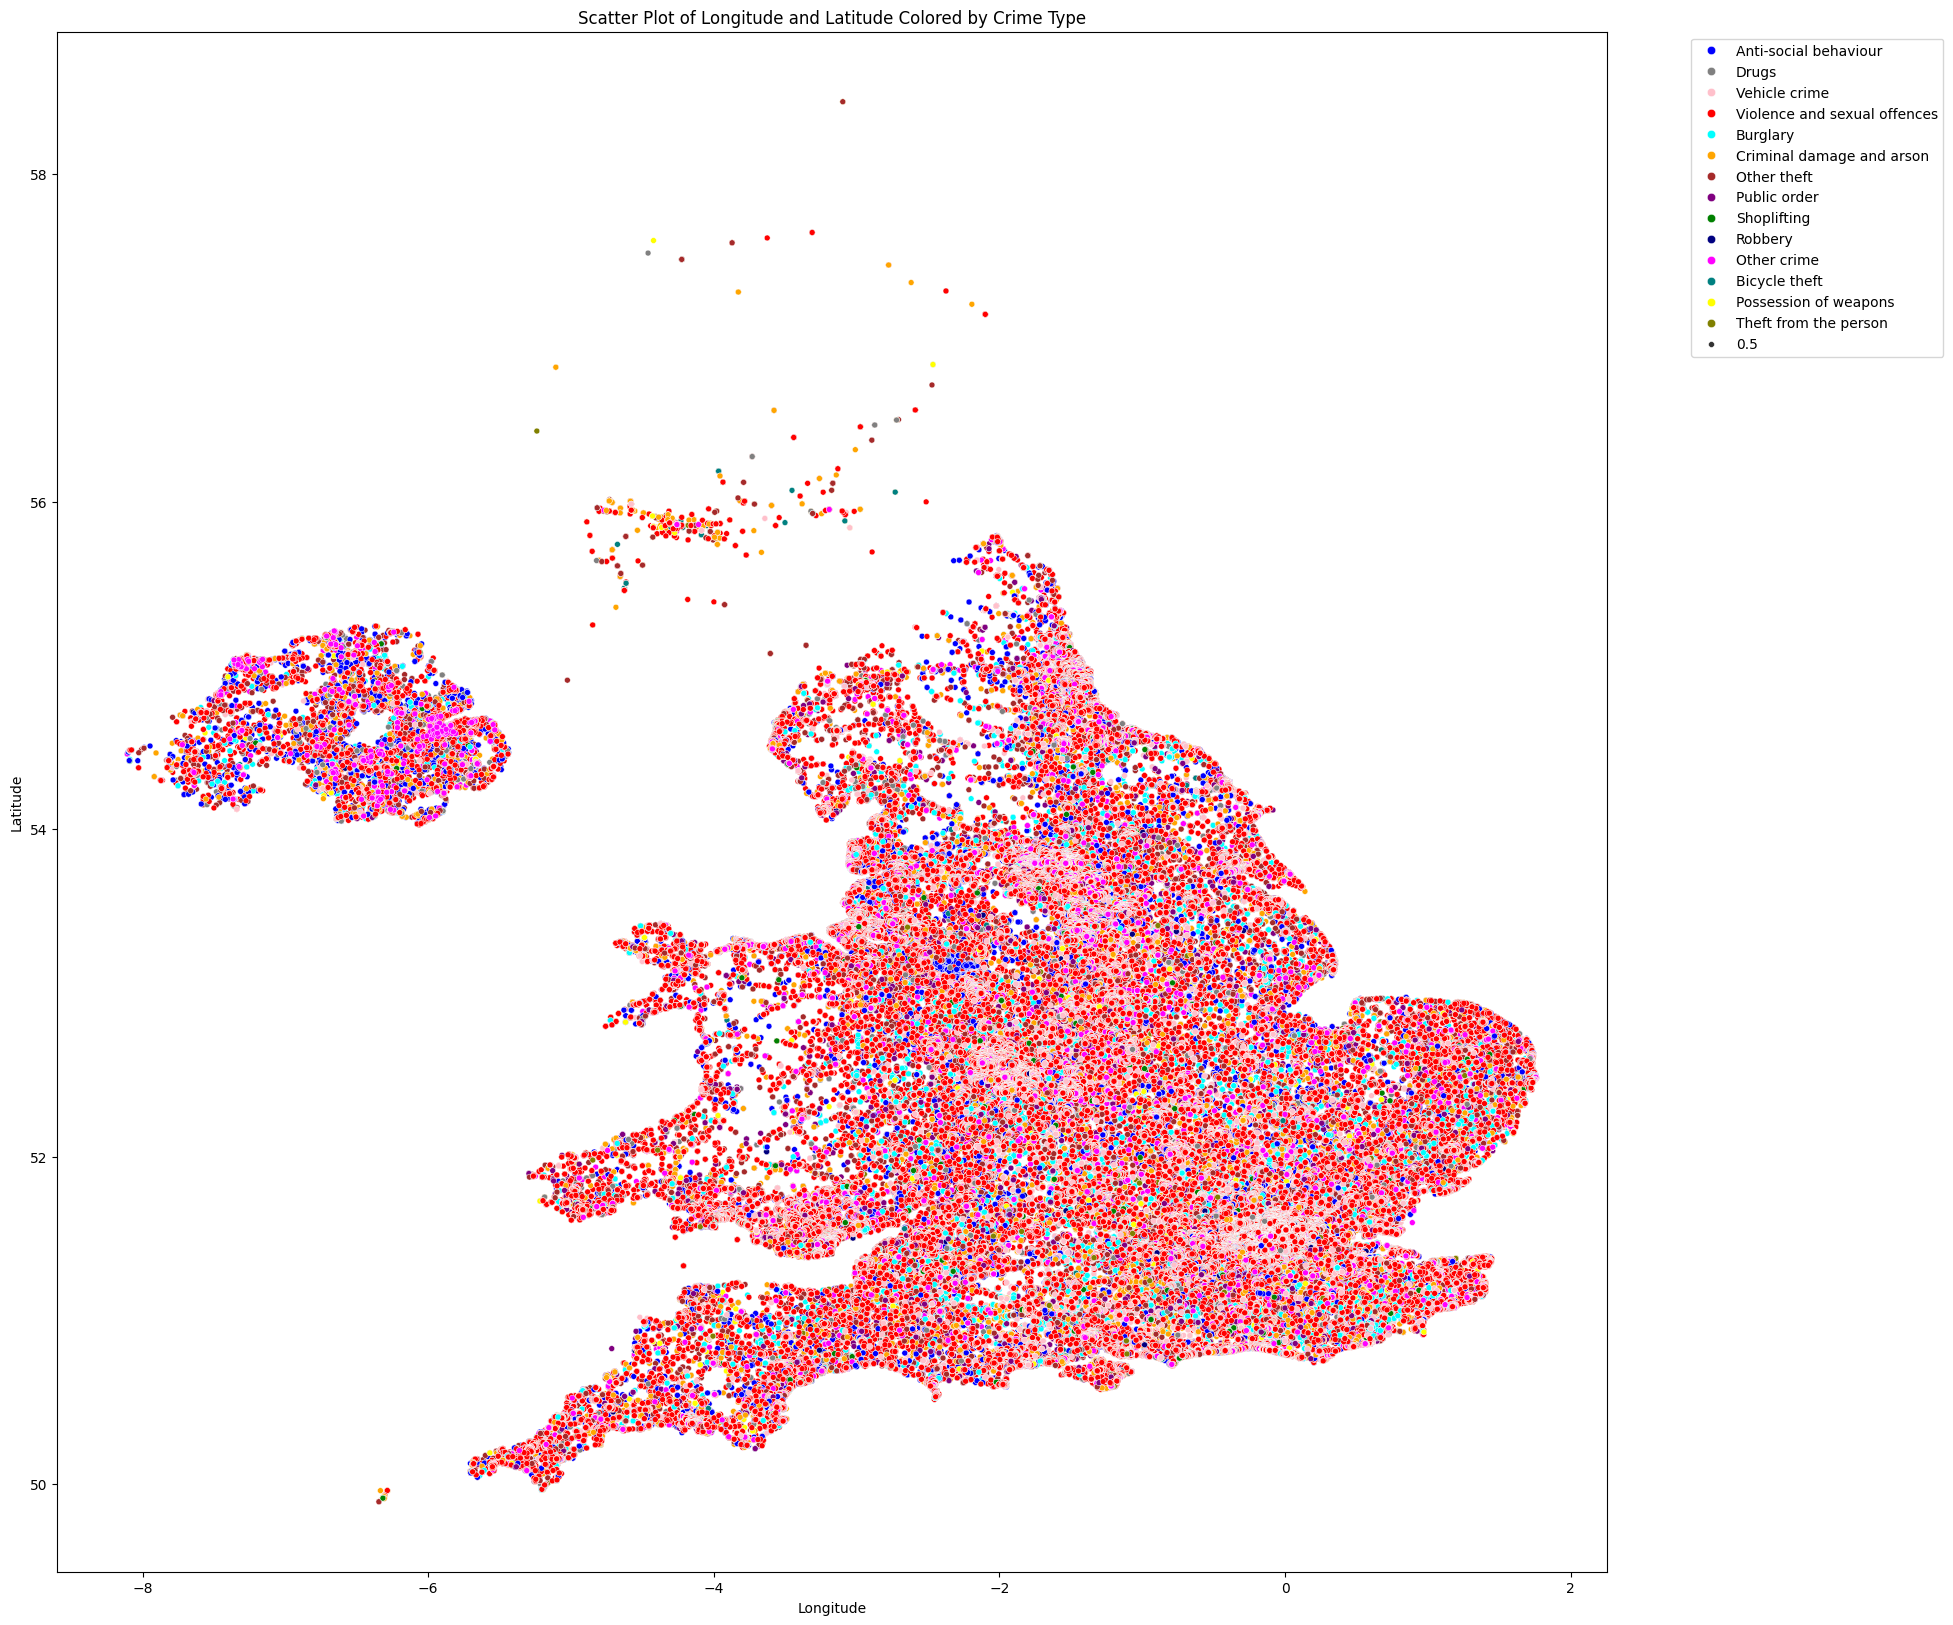

In [68]:
crime_type_colors = {
    'Violence and sexual offences': 'red',
    'Anti-social behaviour': 'blue',
    'Shoplifting': 'green',
    'Criminal damage and arson': 'orange',
    'Public order': 'purple',
    'Other theft': 'brown',
    'Vehicle crime': 'pink',
    'Drugs': 'gray',
    'Burglary': 'cyan',
    'Other crime': 'magenta',
    'Possession of weapons': 'yellow',
    'Theft from the person': 'olive',
    'Bicycle theft': 'teal',
    'Robbery': 'navy'
}
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Crime type', size=0.5,palette=crime_type_colors)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude and Latitude Colored by Crime Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

In [69]:
df.shape

(5973002, 9)

In [71]:
df[df['LSOA code'] == 'E01003513']

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
19255,2023-01,British Transport Police,0.045997,51.508454,On or near Royal Albert (Dlr),E01003513,Newham 035D,Other theft,Not documented
249566,2023-01,Metropolitan Police Service,0.043739,51.508231,On or near Dockside Road,E01003513,Newham 035D,Anti-social behaviour,Not documented
249567,2023-01,Metropolitan Police Service,0.042648,51.511560,On or near Jade Close,E01003513,Newham 035D,Anti-social behaviour,Not documented
249568,2023-01,Metropolitan Police Service,0.045892,51.508365,On or near Royal Albert,E01003513,Newham 035D,Anti-social behaviour,Not documented
249569,2023-01,Metropolitan Police Service,0.046302,51.514940,On or near Woodhatch Close,E01003513,Newham 035D,Burglary,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...
5769981,2023-12,Metropolitan Police Service,0.044395,51.512276,On or near Stansfeld Road,E01003513,Newham 035D,Violence and sexual offences,Under investigation
5769982,2023-12,Metropolitan Police Service,0.045217,51.514536,On or near Crayford Close,E01003513,Newham 035D,Violence and sexual offences,Under investigation
5769983,2023-12,Metropolitan Police Service,0.041484,51.508082,On or near Parking Area,E01003513,Newham 035D,Violence and sexual offences,Under investigation
5769984,2023-12,Metropolitan Police Service,0.045850,51.512574,On or near Parking Area,E01003513,Newham 035D,Violence and sexual offences,Under investigation
